In [1]:
include("../path.jl")
include("../ToolBox/ToolBox.jl")
using .ToolBox
using .Geometry

In [2]:
master_view = [1600:7500,2000:9000]

2-element Array{UnitRange{Int64},1}:
 1600:7500
 2000:9000

In [3]:
slave_meta_path_2 = "/Users/simon/Data/Sentinel/S1A_IW_SLC__1SDV_20170321T054035_20170321T054103_015786_019FEE_8439.SAFE/annotation/s1a-iw3-slc-vv-20170321t054035-20170321t054103-015786-019fee-006.xml"
slave_pod_path_2 = "/Users/simon/Data/Sentinel/S1A_OPER_AUX_POEORB_OPOD_20170410T121606_V20170320T225942_20170322T005942.EOF"
slave_data_path_2 = "/Users/simon/Data/Sentinel/S1A_IW_SLC__1SDV_20170321T054035_20170321T054103_015786_019FEE_8439.SAFE/measurement/s1a-iw3-slc-vv-20170321t054035-20170321t054103-015786-019fee-006.tiff"

"/Users/simon/Data/Sentinel/S1A_IW_SLC__1SDV_20170321T054035_20170321T054103_015786_019FEE_8439.SAFE/measurement/s1a-iw3-slc-vv-20170321t054035-20170321t054103-015786-019fee-006.tiff"

In [4]:
# load meta and pod
master_meta = Load.slc_meta(master_meta_path);
master_precise_orbit = Load.precise_orbit(master_pod_path,master_meta["t_0"]);
slave_meta = Load.slc_meta(slave_meta_path_2);
slave_precise_orbit = Load.precise_orbit(slave_pod_path_2,slave_meta["t_0"]);

In [5]:
meta = (master_meta,slave_meta)
precise_orbit = (master_precise_orbit,slave_precise_orbit);

In [6]:
# load DEM
footprint = SlcUtil.footprint(master_meta, master_view)
latlon_window = ((minimum(footprint[1]),maximum(footprint[1])),(minimum(footprint[2]),maximum(footprint[2])))
dem = Load.dem(dem_path, latlon_window; nan_fill= 0, padding=[90,90]);

In [7]:
slave_data,flat,lut = coregister_slave(master_view,slave_data_path_2,meta,precise_orbit,dem);
slave_data,mosaic_view = SlcUtil.mosaic(slave_data,master_view,meta[2]);
flat,mosaic_view = SlcUtil.mosaic(flat,master_view,meta[2]);

In [8]:
master_data = Load.slc_data(master_data_path,master_view);
master_data,mosaic_view = SlcUtil.mosaic(master_data,master_view,meta[2]);

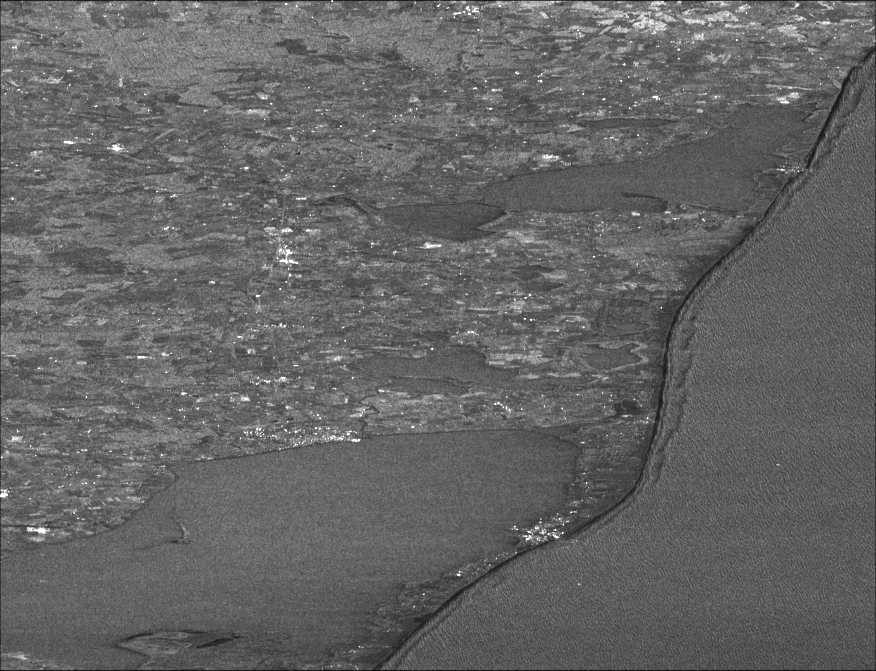

In [9]:
SlcUtil.show_img(master_data)

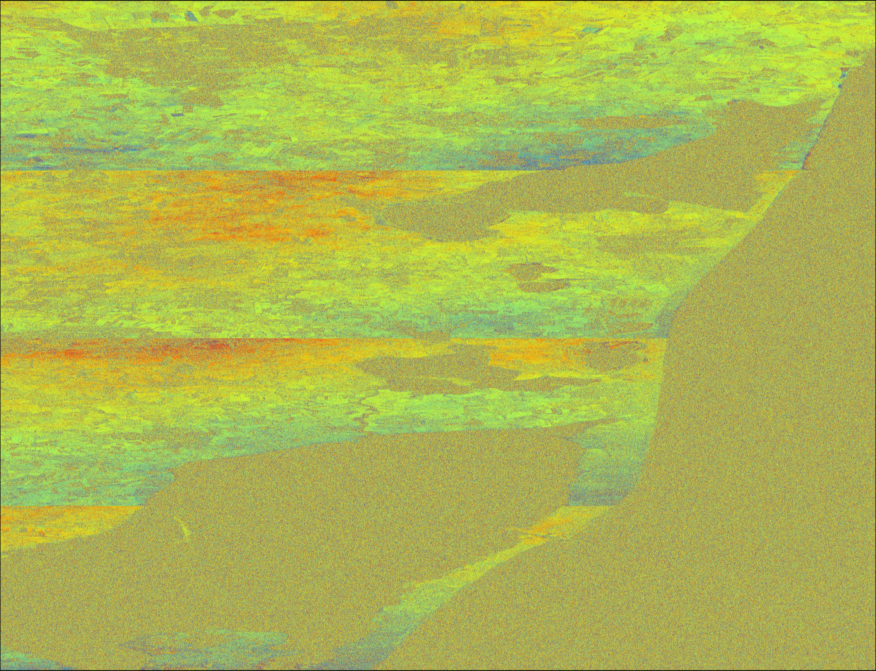

In [10]:
SlcUtil.plot_phase(master_data.* conj.(slave_data) .*flat)

In [11]:
SlcUtil._phase_colorbar()

 -π                 -π/2                 0                 π/2                 π


In [12]:
import FileIO
FileIO.save("infero_mosaic_6days.jpg", SlcUtil.plot_phase(master_data.* conj.(slave_data) .*flat))